In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
wine_data = pd.read_csv('wine.csv')
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_data.shape

(178, 14)

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
wine_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
wine_data[wine_data.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


No duplicate value in the data set.

In [8]:
wine_data1=wine_data.drop(['Type'],axis=1)
wine_data1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Scaling the Data:-

In [9]:
ss=StandardScaler()
x=ss.fit_transform(wine_data1)

In [10]:
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [11]:
pca = PCA()
pca_values = pca.fit_transform(x)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [12]:
var = np.cumsum(pca.explained_variance_ratio_)
var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

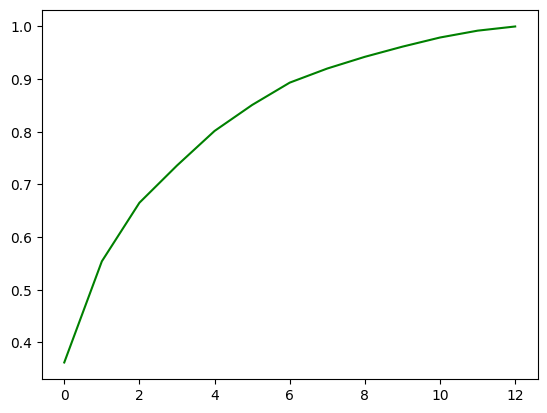

In [13]:
plt.plot(var,color='green')
plt.show()


In [25]:
x = pca_values[:,0]
y = pca_values[:,1]
z = pca_values[:,2]

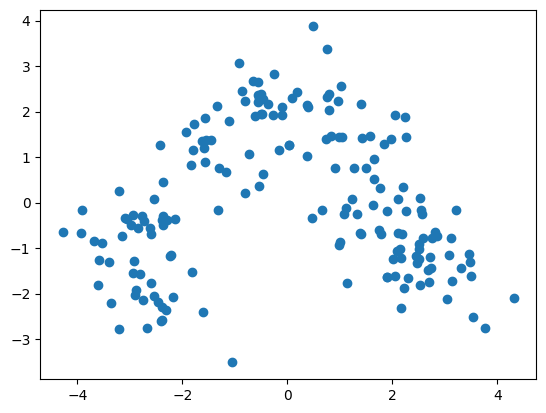

In [33]:
plt.scatter(x,y)
plt.show()

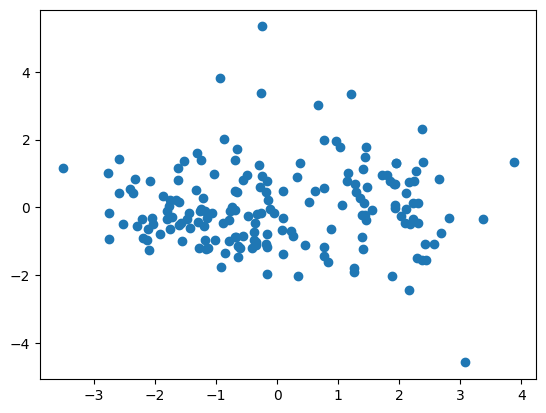

In [34]:
plt.scatter(y,z)
plt.show()

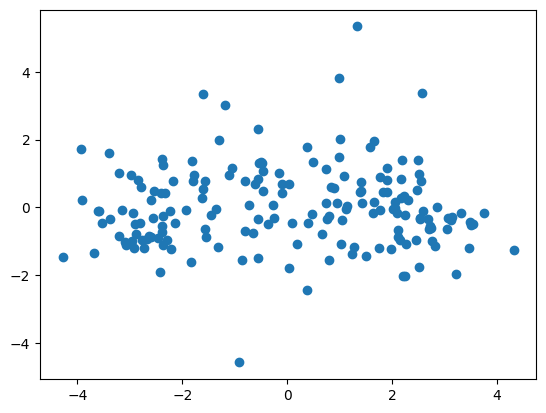

In [35]:
plt.scatter(x,z)
plt.show()

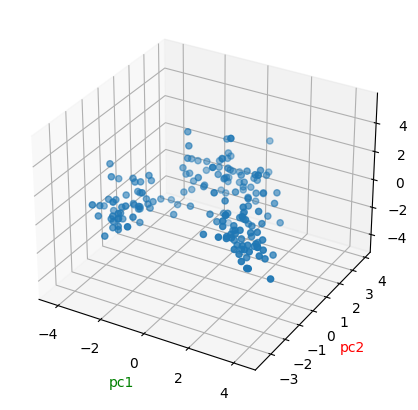

In [39]:
plt.figure(figsize=(6,5))
axes=plt.axes(projection='3d')
axes.scatter3D(x,y,z)
axes.set_xlabel('pc1', color = 'green')
axes.set_ylabel('pc2', color = 'red')
axes.set_zlabel('pc3', color = 'blue')
plt.show()

Taking the First three Components:-

In [40]:
pca_values[:,:3]

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [41]:
wine_data1 = pd.DataFrame(pca_values[0:,:3],columns=['pc1','pc2','pc3'])
wine_data1

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


Hierarchical Clustering:-

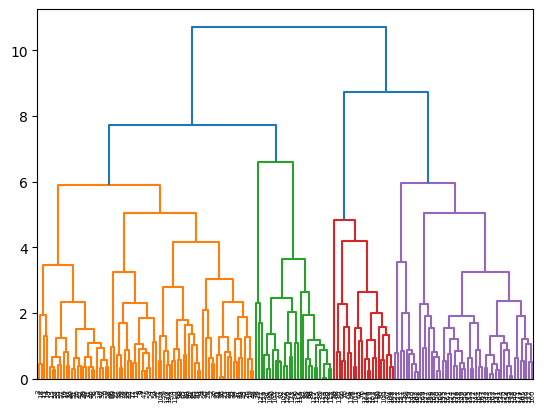

In [42]:
dendrogram=sch.dendrogram(sch.linkage(wine_data1,method='complete'))

In [43]:
hc = AgglomerativeClustering(n_clusters=2,affinity = 'euclidean', linkage = 'ward')
a=hc.fit_predict(wine_data)

In [44]:
wine_data['clusters_id']=pd.Series(a)
wine_data.clusters_id.value_counts()

0    130
1     48
Name: clusters_id, dtype: int64

In [45]:
wine_data.groupby('clusters_id').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clusters_id,,,,,,,,,,,,,,
0,2.269231,12.714077,2.506385,2.346231,20.392308,97.176923,2.086692,1.671308,0.389846,1.462385,4.844000,0.9122,2.429923,583.369231
1,1.041667,13.776667,1.875833,2.421458,17.064583,106.687500,2.859583,2.998750,0.286042,1.938958,5.637917,1.0800,3.103958,1189.770833


In [46]:
hc = AgglomerativeClustering(n_clusters=3,affinity = 'euclidean', linkage = 'ward')
a=hc.fit_predict(wine_data)

In [47]:
wine_data['cluster_id']=pd.Series(a)
wine_data.cluster_id.value_counts()

1    72
2    58
0    48
Name: cluster_id, dtype: int64

In [48]:
wine_data.groupby('cluster_id').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters_id
cluster_id,,,,,,,,,,,,,,,
0,1.041667,13.776667,1.875833,2.421458,17.064583,106.687500,2.859583,2.998750,0.286042,1.938958,5.637917,1.080000,3.103958,1189.770833,1.0
1,2.291667,12.514444,2.515833,2.304028,20.823611,92.736111,2.053750,1.736944,0.391944,1.428056,4.102778,0.940556,2.471667,464.236111,0.0
2,2.241379,12.961897,2.494655,2.398621,19.856897,102.689655,2.127586,1.589828,0.387241,1.505000,5.764138,0.877000,2.378103,731.258621,0.0


In [49]:
hc = AgglomerativeClustering(n_clusters=4,affinity = 'euclidean', linkage = 'ward')
a=hc.fit_predict(wine_data)

In [50]:
wine_data['cluster_id']=pd.Series(a)
wine_data.cluster_id.value_counts()

0    72
2    58
3    28
1    20
Name: cluster_id, dtype: int64

In [51]:
wine_data.groupby('cluster_id').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters_id
cluster_id,,,,,,,,,,,,,,,
0,2.291667,12.514444,2.515833,2.304028,20.823611,92.736111,2.053750,1.736944,0.391944,1.428056,4.102778,0.940556,2.471667,464.236111,0.0
1,1.000000,13.920500,1.769000,2.497500,17.200000,106.650000,2.908000,3.081500,0.295500,1.908500,6.322500,1.117000,3.008500,1360.850000,1.0
2,2.241379,12.961897,2.494655,2.398621,19.856897,102.689655,2.127586,1.589828,0.387241,1.505000,5.764138,0.877000,2.378103,731.258621,0.0
3,1.071429,13.673929,1.952143,2.367143,16.967857,106.714286,2.825000,2.939643,0.279286,1.960714,5.148929,1.053571,3.172143,1067.571429,1.0


K- Means Clustering:-

Elbow Graph:-

[17592669.84980061, 4543973.580237702, 2370801.842682027, 1331996.667600553, 916467.367390834, 647424.0599863133, 412203.4510062451, 324611.0889826031, 271021.97797963297, 217944.5277886245]


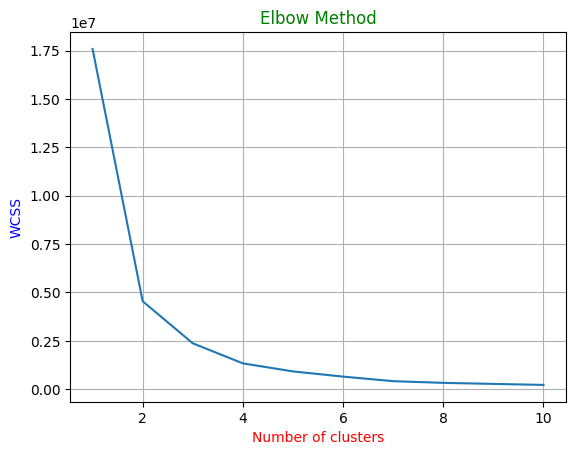

In [52]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine_data)
    wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method', color = 'green')
plt.xlabel('Number of clusters', color = 'red')
plt.ylabel('WCSS', color = 'blue')
plt.grid()
plt.show()

The three cluster steepness of the group - decreases.

In [53]:
kMeans =  KMeans(3,random_state=0)
kmeans.fit(wine_data1)

KMeans(n_clusters=10, random_state=0)

In [54]:
kmeans.labels_

array([2, 9, 8, 2, 8, 2, 2, 8, 2, 2, 2, 9, 9, 2, 2, 8, 8, 8, 2, 8, 2, 8,
       9, 5, 8, 4, 8, 9, 8, 9, 8, 2, 8, 8, 8, 8, 8, 8, 9, 2, 2, 9, 2, 8,
       9, 8, 2, 2, 8, 2, 9, 2, 2, 8, 2, 8, 2, 8, 2, 1, 3, 3, 1, 5, 7, 5,
       9, 1, 3, 9, 3, 5, 3, 4, 5, 1, 1, 3, 9, 7, 1, 5, 7, 6, 5, 5, 7, 7,
       7, 7, 3, 7, 3, 5, 5, 8, 7, 1, 5, 5, 1, 1, 7, 1, 1, 7, 1, 3, 1, 5,
       5, 7, 7, 7, 7, 7, 1, 7, 3, 1, 5, 4, 7, 7, 5, 7, 7, 7, 7, 3, 3, 6,
       6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0,
       6, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 0, 6, 0, 0, 6, 6, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [55]:
wine_data['cluster_id_kmeans']=pd.Series(kmeans.labels_)
wine_data.cluster_id_kmeans.value_counts()

6    27
8    25
2    23
7    23
0    20
5    16
1    15
9    13
3    13
4     3
Name: cluster_id_kmeans, dtype: int64

In [56]:
wine_data.groupby('cluster_id_kmeans').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters_id,cluster_id
cluster_id_kmeans,,,,,,,,,,,,,,,,
0,3.000000,13.429000,3.387000,2.524000,22.475000,103.600000,1.837000,0.927500,0.444500,1.477500,9.262000,0.618000,1.611000,655.250000,0.000000,1.400000
1,2.000000,12.312667,1.550667,1.888000,17.933333,87.666667,2.072667,1.808000,0.314000,1.384000,2.954000,1.097333,2.836667,495.066667,0.000000,0.400000
2,1.000000,14.093478,1.900435,2.374348,15.634783,108.130435,3.081304,3.296522,0.265217,2.116957,6.347826,1.041739,3.254783,1186.391304,0.869565,2.000000
3,2.153846,12.584615,1.922308,2.240769,19.030769,94.230769,1.761538,1.348462,0.463077,1.088462,3.533077,0.924308,2.042308,570.538462,0.000000,0.769231
4,1.666667,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.310000,1.123333,3.463333,760.000000,0.333333,1.666667
5,1.937500,12.225000,1.942500,2.335625,19.293750,92.937500,2.803125,2.648125,0.256875,2.088750,3.308750,1.066250,3.089375,565.062500,0.062500,0.937500
6,2.962963,12.980741,3.464815,2.379630,20.944444,95.296296,1.554815,0.693333,0.458889,0.935185,6.112222,0.731111,1.770370,606.111111,0.000000,0.814815
7,2.000000,12.104348,2.164783,2.430435,22.543478,92.086957,2.181304,2.033913,0.421304,1.513043,2.658696,1.059130,2.837826,453.217391,0.000000,0.347826
8,1.040000,13.547200,2.148000,2.591600,18.580000,110.720000,2.736400,2.816800,0.319600,1.832000,5.104400,1.080400,3.032800,1061.480000,0.680000,2.120000


In [57]:
wine_data.groupby('Type').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters_id,cluster_id,cluster_id_kmeans
Type,,,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,0.779661,2.101695,5.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,0.028169,0.591549,4.690141
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.000000,1.125000,3.375000


In original dataset, the number of clusters was '(Three)'. With K-Means Clustering we found the ideal number of cluster to be ('Three').

But the hierarchical clustering we foung the ideal number of clusters to be ('Four').

In [58]:
wine_data1['cluster_id ']=wine_data['cluster_id']
wine_data1['cluster_id_kmeans']=wine_data['cluster_id_kmeans']
wine_data1['Type']=wine_data['Type']

K- Means Clustering:-

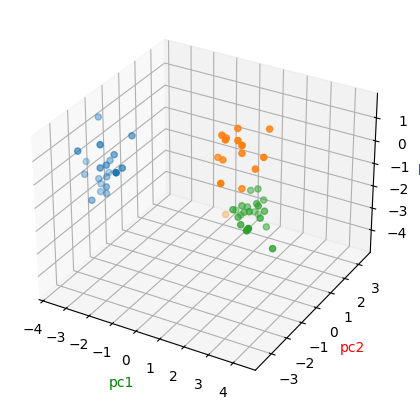

In [59]:
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
axes.scatter3D(wine_data1[wine_data1['cluster_id_kmeans']==0].pc1,wine_data1[wine_data1['cluster_id_kmeans']==0].pc2,wine_data1[wine_data1['cluster_id_kmeans']==0].pc3,'c1')
axes.scatter3D(wine_data1[wine_data1['cluster_id_kmeans']==1].pc1,wine_data1[wine_data1['cluster_id_kmeans']==1].pc2,wine_data1[wine_data1['cluster_id_kmeans']==1].pc3,'c2')
axes.scatter3D(wine_data1[wine_data1['cluster_id_kmeans']==2].pc1,wine_data1[wine_data1['cluster_id_kmeans']==2].pc2,wine_data1[wine_data1['cluster_id_kmeans']==2].pc3,'c3')
axes.set_xlabel('pc1', color = 'green')
axes.set_ylabel('pc2', color = 'red')
axes.set_zlabel('pc3', color = 'blue')
plt.show()

Column Types:-

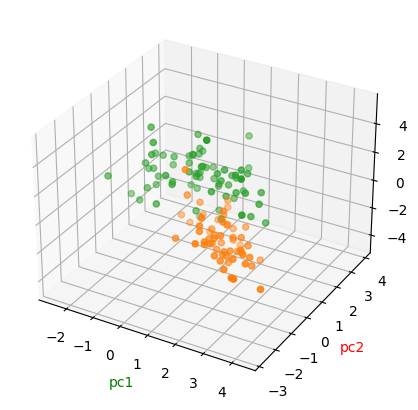

In [60]:
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
axes.scatter3D(wine_data1[wine_data1['Type']==0].pc1,wine_data1[wine_data1['Type']==0].pc2,wine_data1[wine_data1['Type']==0].pc3,'c1')
axes.scatter3D(wine_data1[wine_data1['Type']==1].pc1,wine_data1[wine_data1['Type']==1].pc2,wine_data1[wine_data1['Type']==1].pc3,'c2')
axes.scatter3D(wine_data1[wine_data1['Type']==2].pc1,wine_data1[wine_data1['Type']==2].pc2,wine_data1[wine_data1['Type']==2].pc3,'c3')
axes.set_xlabel('pc1', color = 'green')
axes.set_ylabel('pc2', color = 'red')
axes.set_zlabel('pc3', color = 'blue')
plt.show()

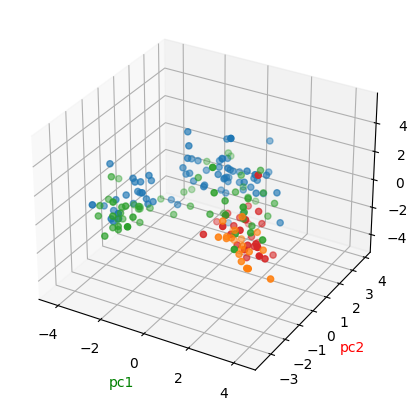

In [61]:
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
axes.scatter3D(wine_data1[wine_data1['cluster_id ']==0].pc1,wine_data1[wine_data1['cluster_id ']==0].pc2,wine_data1[wine_data1['cluster_id ']==0].pc3,'c1')
axes.scatter3D(wine_data1[wine_data1['cluster_id ']==1].pc1,wine_data1[wine_data1['cluster_id ']==1].pc2,wine_data1[wine_data1['cluster_id ']==1].pc3,'c1')
axes.scatter3D(wine_data1[wine_data1['cluster_id ']==2].pc1,wine_data1[wine_data1['cluster_id ']==2].pc2,wine_data1[wine_data1['cluster_id ']==2].pc3,'c2')
axes.scatter3D(wine_data1[wine_data1['cluster_id ']==3].pc1,wine_data1[wine_data1['cluster_id ']==3].pc2,wine_data1[wine_data1['cluster_id ']==3].pc3,'c3')
axes.set_xlabel('pc1', color = 'green')
axes.set_ylabel('pc2', color = 'red')
axes.set_zlabel('pc3', color = 'blue')
plt.show()